# Version 2 of modelling covid-19

In this version the full set of actualized data is downloaded directly. The
goal of this notebook is to learn how to read csv files and select and plot
specific parts of them

## Data source
This is the European Center for Disiease Control, which provide an updated data file with all the information that we could also obtain using our first method.
This is already compiled into a file for you.
https://opendata.ecdc.europa.eu/covid19/casedistribution/csv


In [0]:
import os
from io import StringIO
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
url = "https://opendata.ecdc.europa.eu/covid19/casedistribution/csv"
req = requests.get(url)
data = StringIO(req.text)
df = pd.read_csv(data)
print(df)

         dateRep  day  month  ...  geoId  countryterritoryCode  popData2018
0     06/04/2020    6      4  ...     AF                   AFG   37172386.0
1     05/04/2020    5      4  ...     AF                   AFG   37172386.0
2     04/04/2020    4      4  ...     AF                   AFG   37172386.0
3     03/04/2020    3      4  ...     AF                   AFG   37172386.0
4     02/04/2020    2      4  ...     AF                   AFG   37172386.0
...          ...  ...    ...  ...    ...                   ...          ...
9102  25/03/2020   25      3  ...     ZW                   ZWE   14439018.0
9103  24/03/2020   24      3  ...     ZW                   ZWE   14439018.0
9104  23/03/2020   23      3  ...     ZW                   ZWE   14439018.0
9105  22/03/2020   22      3  ...     ZW                   ZWE   14439018.0
9106  21/03/2020   21      3  ...     ZW                   ZWE   14439018.0

[9107 rows x 10 columns]


We have different ways of accesing the data. 
*.groupby is a very useful function:

In [0]:
df.groupby('countriesAndTerritories').plot(x='dateRep',y='cases')

In [0]:
grouped = df.groupby('countriesAndTerritories')
spain = grouped.get_group('Spain')

An alternative way of doing this:

In [24]:
# Let's see the information on the columns
print(df.columns)
# And rows
print(df.index)
# Now we can save the data for a specific country
country_df = df[df.countriesAndTerritories == 'Spain']
# Lets shfit the index range so as it starts in 1. But also we should change the 
# order, from first day to last date
print(country_df.index)



Index(['dateRep', 'day', 'month', 'year', 'cases', 'deaths',
       'countriesAndTerritories', 'geoId', 'countryterritoryCode',
       'popData2018'],
      dtype='object')
RangeIndex(start=0, stop=9107, step=1)
Int64Index([7789, 7790, 7791, 7792, 7793, 7794, 7795, 7796, 7797, 7798, 7799,
            7800, 7801, 7802, 7803, 7804, 7805, 7806, 7807, 7808, 7809, 7810,
            7811, 7812, 7813, 7814, 7815, 7816, 7817, 7818, 7819, 7820, 7821,
            7822, 7823, 7824, 7825, 7826, 7827, 7828, 7829, 7830, 7831, 7832,
            7833, 7834, 7835, 7836, 7837, 7838, 7839, 7840, 7841, 7842, 7843,
            7844, 7845, 7846, 7847, 7848, 7849, 7850, 7851, 7852, 7853, 7854,
            7855, 7856, 7857, 7858, 7859, 7860, 7861, 7862, 7863, 7864, 7865,
            7866, 7867, 7868, 7869, 7870, 7871, 7872, 7873, 7874, 7875, 7876,
            7877, 7878, 7879, 7880, 7881, 7882, 7883, 7884, 7885, 7886],
           dtype='int64')


The order now in the datafram has the most up to date data at the top. Let's reverse that.

In [25]:
# First lets reverse all the rows
country_df = country_df.iloc[::-1]
# And now we reset the index
country_df = country_df.reset_index()
# lets look if this worked
country_df.head()





,index,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
0,7886,31/12/2019,31,12,2019,0,0,Spain,ES,ESP,46723749.0
1,7885,01/01/2020,1,1,2020,0,0,Spain,ES,ESP,46723749.0
2,7884,02/01/2020,2,1,2020,0,0,Spain,ES,ESP,46723749.0
3,7883,03/01/2020,3,1,2020,0,0,Spain,ES,ESP,46723749.0
4,7882,04/01/2020,4,1,2020,0,0,Spain,ES,ESP,46723749.0


We can now do all the analysis we want on the data:

In [38]:

country_df.describe()
# Total cases as of today:
print(sum(country_df.cases))
# cumulative sum
#tmp = country_df.cases.cumsum
country_df['sum_cases'] = country_df['cases'].cumsum()
country_df['sum_deaths'] = country_df['deaths'].cumsum()
country_df.head()




130759


,index,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,sum_cases,sum_deaths
0,7886,31/12/2019,31,12,2019,0,0,Spain,ES,ESP,46723749.0,0,0
1,7885,01/01/2020,1,1,2020,0,0,Spain,ES,ESP,46723749.0,0,0
2,7884,02/01/2020,2,1,2020,0,0,Spain,ES,ESP,46723749.0,0,0
3,7883,03/01/2020,3,1,2020,0,0,Spain,ES,ESP,46723749.0,0,0
4,7882,04/01/2020,4,1,2020,0,0,Spain,ES,ESP,46723749.0,0,0


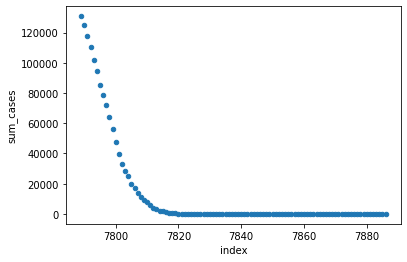

In [43]:
country_df.plot.scatter(x='index',y='sum_cases',marker='o')

